In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

# Ensemble Methods
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse

In [104]:
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [105]:
data = pd.read_csv('data/Sell-Out Data.csv', low_memory=False, thousands=',')

In [106]:
data.head()

,UNIT,DEALER,CHANNEL,SALES CHANNEL,REGION,WEEK,MONTH,QUARTER,YEAR,BRAND,CAPACITY,COMPRESSOR,COMPANY,QUANTITY
0,H-Wall,ABENSON,Modern Trade,Modern Trade,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Carrier,2.0hp,Variable Speed,CSG,4
1,Wrac,ABENSON,Modern Trade,Modern Trade,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Kelvinator,1.0hp,Fixed Speed,CSG,2
2,Wrac,ABENSON,Modern Trade,Modern Trade,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Condura,1.0hp,Variable Speed,CSG,2
3,Wrac,ABENSON,Modern Trade,Modern Trade,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Condura,1.0hp,Fixed Speed,CSG,2
4,Wrac,ABENSON,Modern Trade,Modern Trade,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Condura,1.0hp,Fixed Speed,CSG,2


In [5]:
data.shape

(347524, 14)

In [6]:
data.dtypes

UNIT             object
DEALER           object
CHANNEL          object
SALES CHANNEL    object
REGION           object
WEEK             object
MONTH            object
QUARTER          object
YEAR              int64
BRAND            object
CAPACITY         object
COMPRESSOR       object
COMPANY          object
QUANTITY          int64
dtype: object

In [7]:
data.describe()

,YEAR,QUANTITY
count,347524.0,347524.000000
mean,2018.0,4.588610
std,0.0,15.963357
min,2018.0,0.000000
25%,2018.0,2.000000
50%,2018.0,2.000000
75%,2018.0,4.000000
max,2018.0,2287.000000


In [8]:
# Convert Quantity to numeric
data['QUANTITY'] = pd.to_numeric(data['QUANTITY'], errors='coerce')

# Drop empty values
data.dropna(inplace=True)

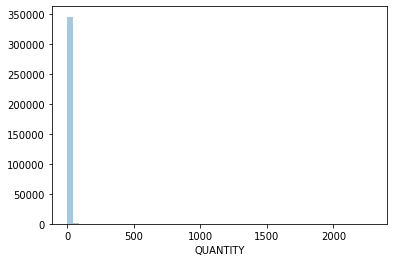

In [9]:
sns.distplot(data.QUANTITY, kde=False)

In [10]:
data.QUANTITY.describe(np.arange(0.1, 1, 0.1))

count    347524.000000
mean          4.588610
std          15.963357
min           0.000000
10%           2.000000
20%           2.000000
30%           2.000000
40%           2.000000
50%           2.000000
60%           2.000000
70%           4.000000
80%           4.000000
90%           6.000000
max        2287.000000
Name: QUANTITY, dtype: float64

In [11]:
data_quantity_quantiles = data.QUANTITY.describe(np.arange(0.01, 1, 0.01))
data_quantity_quantiles

count    347524.000000
mean          4.588610
std          15.963357
min           0.000000
1%            1.000000
             ...      
96%          15.000000
97%          38.000000
98%          38.000000
99%          38.000000
max        2287.000000
Name: QUANTITY, Length: 104, dtype: float64

In [12]:
data_quantity_quantiles['99%']

38.0

### Data Cleaning

In [14]:
# Remove 99th percentile
# new_data = data[(data['QUANTITY'] <= data_quantity_quantiles['99%']) &
#                 (data['QUANTITY'] >= data_quantity_quantiles['1%'])]

# # Retain non-competitor data
# new_data = new_data[new_data['COMPANY'] != 'Competitors']
new_data = data[data['COMPANY'] != 'Competitors']

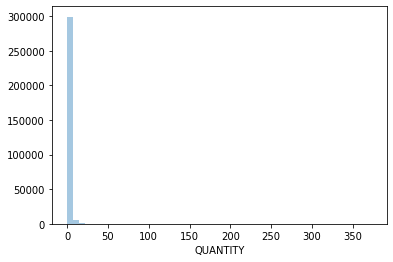

In [15]:
sns.distplot(new_data['QUANTITY'], kde=False)

### EDA

In [30]:
# For each brand in the dataset, what types of unit, capacity and compressor are there?
unique_acs = new_data[['BRAND', 'UNIT', 'CAPACITY', 'COMPRESSOR']].drop_duplicates()

# Carrier
unique_acs[unique_acs['BRAND']=='Carrier'].sort_values(['UNIT', 'CAPACITY', 'COMPRESSOR'])

,BRAND,UNIT,CAPACITY,COMPRESSOR
281,Carrier,H-Wall,1.0hp,Fixed Speed
8,Carrier,H-Wall,1.0hp,Variable Speed
148,Carrier,H-Wall,1.5hp,Fixed Speed
62,Carrier,H-Wall,1.5hp,Variable Speed
202,Carrier,H-Wall,2.0hp,Fixed Speed
0,Carrier,H-Wall,2.0hp,Variable Speed
23,Carrier,H-Wall,2.5hp,Fixed Speed
14,Carrier,H-Wall,2.5hp,Variable Speed
3438,Carrier,H-Wall,3.0hp,Fixed Speed
88,Carrier,H-Wall,3.0hp,Variable Speed


In [31]:
# Condura
unique_acs[unique_acs['BRAND']=='Condura'].sort_values(['UNIT', 'CAPACITY', 'COMPRESSOR'])

,BRAND,UNIT,CAPACITY,COMPRESSOR
294,Condura,H-Wall,1.0hp,Fixed Speed
110,Condura,H-Wall,1.0hp,Variable Speed
61,Condura,H-Wall,1.5hp,Fixed Speed
111,Condura,H-Wall,1.5hp,Variable Speed
503,Condura,H-Wall,2.0hp,Fixed Speed
112,Condura,H-Wall,2.0hp,Variable Speed
89,Condura,H-Wall,2.5hp,Fixed Speed
421,Condura,H-Wall,2.5hp,Variable Speed
144722,Condura,PE,2.0Tons,Fixed Speed
6202,Condura,PE,3Tons,Fixed Speed


In [32]:
# Kelvinator
unique_acs[unique_acs['BRAND']=='Kelvinator'].sort_values(['UNIT', 'CAPACITY', 'COMPRESSOR'])

,BRAND,UNIT,CAPACITY,COMPRESSOR
12,Kelvinator,Wrac,0.5hp,Fixed Speed
19,Kelvinator,Wrac,0.75hp,Fixed Speed
1,Kelvinator,Wrac,1.0hp,Fixed Speed
818,Kelvinator,Wrac,1.5hp,Fixed Speed


In [26]:
# How many are competitors-only, and company-owned
data.head()

,UNIT,DEALER,CHANNEL,SALES CHANNEL,REGION,WEEK,MONTH,QUARTER,YEAR,BRAND,CAPACITY,COMPRESSOR,COMPANY,QUANTITY
0,H-Wall,ABENSON,Modern Trade,Modern Trade,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Carrier,2.0hp,Variable Speed,CSG,4
1,Wrac,ABENSON,Modern Trade,Modern Trade,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Kelvinator,1.0hp,Fixed Speed,CSG,2
2,Wrac,ABENSON,Modern Trade,Modern Trade,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Condura,1.0hp,Variable Speed,CSG,2
3,Wrac,ABENSON,Modern Trade,Modern Trade,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Condura,1.0hp,Fixed Speed,CSG,2
4,Wrac,ABENSON,Modern Trade,Modern Trade,VISAYAS,Week 1-2018,Jan-18,Q1,2018,Condura,1.0hp,Fixed Speed,CSG,2


In [28]:
# Percent competitor data vs company data (number of rows)
data['COMPANY'].value_counts()/data['COMPANY'].shape

CSG            0.882788
Competitors    0.117212
Name: COMPANY, dtype: float64

In [91]:
# Percent competitor data vs company data (quantities sold)
data.groupby('COMPANY')['QUANTITY'].sum()

COMPANY
CSG            821626
Competitors    773026
Name: QUANTITY, dtype: int64

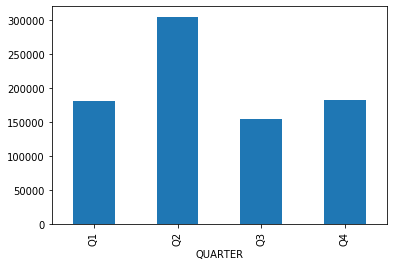

In [41]:
# Units sold per quarter
new_data.groupby('QUARTER')['QUANTITY'].sum().plot(kind='bar')

/Users/xmpuspus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  


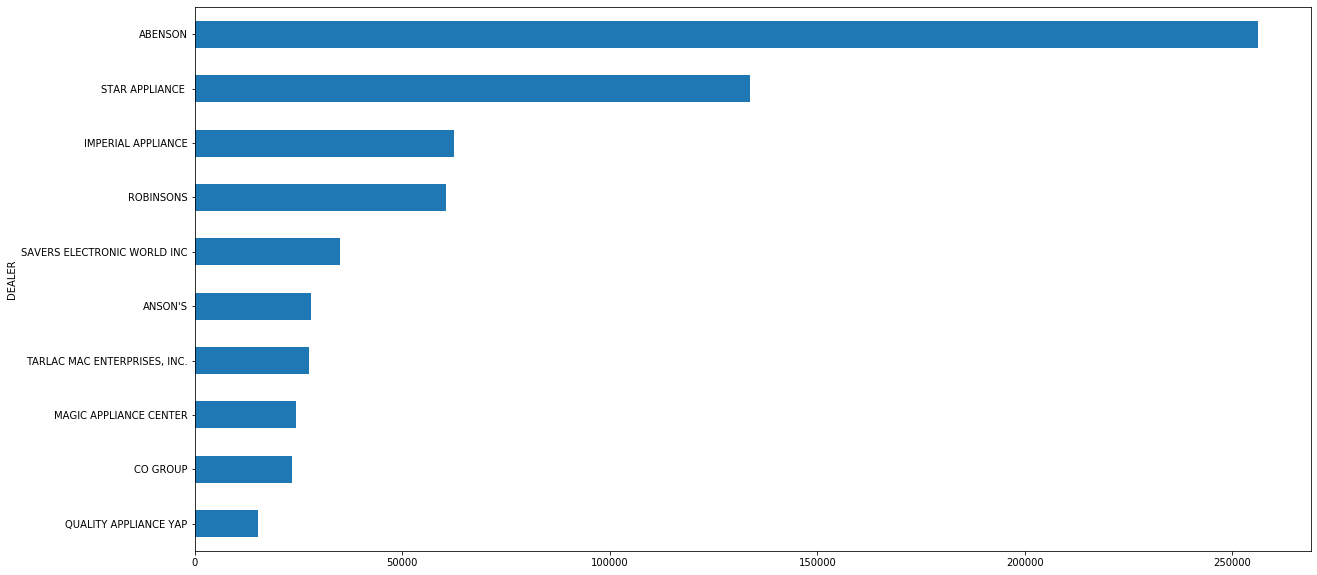

In [47]:
# Units sold per Dealer
new_data.groupby('DEALER')['QUANTITY'].sum().sort_values(ascending=False)[:10].plot('barh', figsize=(20, 10))
plt.gca().invert_yaxis()

In [78]:
new_data[['CHANNEL', 'SALES CHANNEL']].drop_duplicates()

,CHANNEL,SALES CHANNEL
0,Modern Trade,Modern Trade
13,Traditional,GMA/SL
30,Traditional,VIS
346,Modern Trade,GMA/SL
925,Traditional,MIN
967,Traditional,NCL


In [90]:
# Percent Modern vs traditional
new_data.groupby('CHANNEL')['QUANTITY'].sum()#/data['CHANNEL'].shape

CHANNEL
Modern Trade    511876
Traditional     309750
Name: QUANTITY, dtype: int64

In [89]:
# Diffent Regions
new_data.groupby('SALES CHANNEL')['QUANTITY'].sum()#/data['SALES CHANNEL'].shape

SALES CHANNEL
GMA/SL          114302
MIN              32902
Modern Trade    459169
NCL             122168
VIS              93085
Name: QUANTITY, dtype: int64

In [88]:
## Percent diff units
new_data.groupby('UNIT')['QUANTITY'].sum()#/data['UNIT'].shape

UNIT
H-Wall    255272
PE         35418
Wrac      530936
Name: QUANTITY, dtype: int64

/Users/xmpuspus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


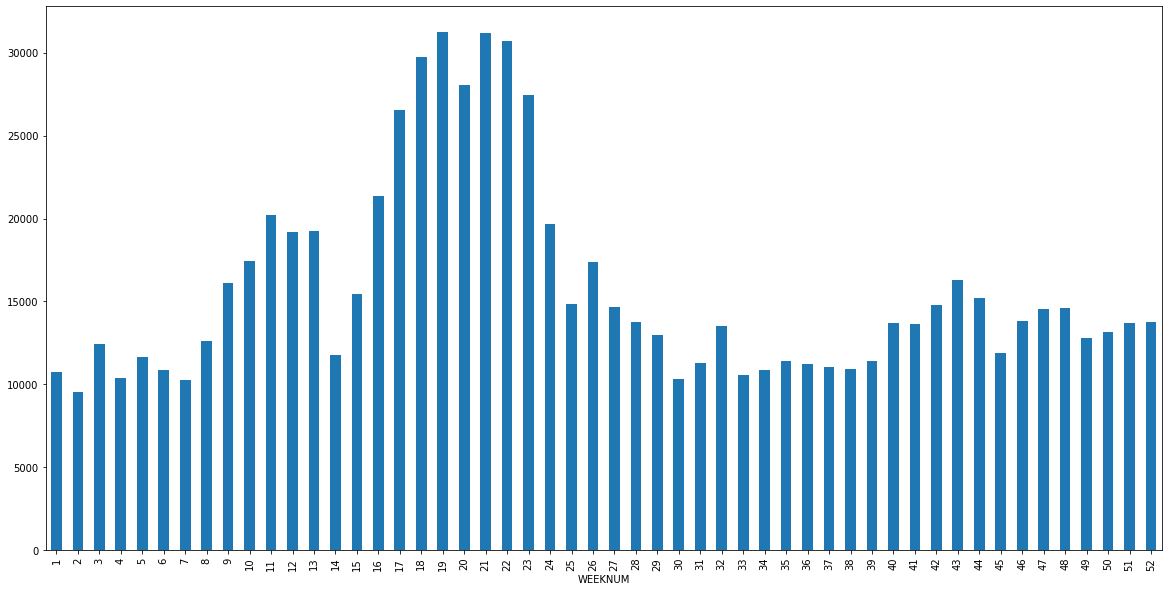

In [72]:
# Units sold per week

# Get weeknumber by parsing text
new_data['WEEKNUM'] = new_data['WEEK'].apply(lambda x: int(x.split('-')[0].split(' ')[1]))

# Groupby week to see weekly units sold
new_data.groupby('WEEKNUM')['QUANTITY'].sum().plot(kind='bar', figsize=(20,10))

In [74]:
# Units sold per Month

# Groupby month to see weekly units sold
new_data.groupby('MONTH')['QUANTITY'].sum()#.plot(kind='bar', figsize=(20,10))

MONTH
Apr-18     75124
Aug-18     46341
Dec-18     53369
Feb-18     49823
Jan-18     54717
Jul-18     63015
Jun-18     79319
Mar-18     76045
May-18    150915
Nov-18     54805
Oct-18     73571
Sep-18     44582
Name: QUANTITY, dtype: int64

In [87]:
# Most sold AC unit in Abenson? 
new_data[new_data['DEALER']=='ABENSON'].groupby('UNIT')['QUANTITY'].sum()#/data['DEALER'].shape

UNIT
H-Wall     77732
PE         10800
Wrac      167546
Name: QUANTITY, dtype: int64

In [102]:
# Types of units sold for all using one line of code
sold_units_per_dealer_per_type = new_data.groupby(['DEALER','UNIT'])['QUANTITY'].sum()
sold_units_per_dealer_per_type

DEALER                               UNIT  
ABENSON                              H-Wall     77732
                                     PE         10800
                                     Wrac      167546
ADDESSA CORPORATION                  H-Wall      2912
                                     PE           185
                                     Wrac        4025
ALL HOME                             H-Wall       789
                                     PE            13
                                     Wrac        1517
ALSON-JAYSON                         H-Wall      1430
                                     PE           381
                                     Wrac        2639
ANSON'S                              H-Wall      9054
                                     PE           529
                                     Wrac       18538
APPLIANCE CENTRUM GROUP              H-Wall       416
                                     PE            16
                                     W

### Feature Engineering

In [ ]:
# Get Features
features = new_data.drop(['QUANTITY'], axis=1)

# Dummify
X = pd.get_dummies(features)

# Get Targets
y = new_data['QUANTITY']

In [ ]:
X.shape

In [ ]:
X.shape, y.shape

### Modelling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
# model = GradientBoostingRegressor(n_estimators=300, random_state=42)

# Fit Model
%time model.fit(X_train, y_train)

### Feature Importances

In [ ]:
feature_importances_df = pd.DataFrame({"Features": X.columns,
                                       "Feature Importance": model.feature_importances_}
                                     ).sort_values('Feature Importance', ascending=False).set_index('Features')

# Top 20 Features
feature_importances_df[:20].plot(kind='barh')
plt.gca().invert_yaxis()

In [ ]:
data.UNIT.value_counts()/data.UNIT.shape[0]

### RMSE

In [ ]:
# Train Predictions
y_pred_train = model.predict(X_train).astype(int)

# Test Predictions
y_pred = model.predict(X_test).astype(int)

# Train RMSE
rmse_score_train = np.sqrt(mse(y_pred_train, y_train))

# Test RMSE
rmse_score = np.sqrt(mse(y_pred, y_test))

In [ ]:
rmse_score, rmse_score_train

RMSE is pretty good.

### Compare Predictions from Actual Price

In [ ]:
prediction_real_df = pd.DataFrame({"Real Sales Quantity": y_test, "Predicted Sales Quantity": y_pred})

In [ ]:
prediction_real_df.plot.scatter('Real Sales Quantity', 'Predicted Sales Quantity')

Predictions are pretty conservative, meaning, they are generally predicting low sale count.

### Another Metric

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

### Save Model

In [ ]:
pd.options.display.max_columns = 999

In [ ]:
import joblib

In [ ]:
joblib.dump(model, 'model/cortex_model.sav')

In [ ]:
X_train.head()

In [ ]:
features

In [ ]:
# Education Level
unit_values = pd.Series(data['UNIT'].unique()).str.strip()
unit_dummies = pd.get_dummies(unit_values)

# unit_sample = st.sidebar.selectbox("AC Unit", unit_values.values.tolist())

unit_sample_dummies = (unit_dummies.loc[np.where(unit_values.values == 'H-Wall')[0]]
                                  .values.tolist()[0])

In [ ]:
unit_dummies

In [ ]:
unit_sample_dummies + unit_sample_dummies

In [ ]:
# Unit Level
data = new_data.copy()
unit_values = pd.Series(data['UNIT'].unique()).str.strip()
unit_dummies = pd.get_dummies(unit_values)

# unit_sample = st.sidebar.selectbox("AC Unit", unit_values.values.tolist())

unit_sample_dummies = (unit_dummies.loc[np.where(unit_values.values == 'H-Wall')[0]]
                                  .values.tolist()[0])


# Dealer Level
dealer_values = pd.Series(data['DEALER'].unique()).str.strip()
dealer_dummies = pd.get_dummies(dealer_values)

# dealer_sample = st.sidebar.selectbox("Dealer", dealer_values.values.tolist())

dealer_sample_dummies = (dealer_dummies.loc[np.where(dealer_values.values == 'ABENSON')[0]]
                                  .values.tolist()[0])


# Channel Level
channel_values = pd.Series(data['CHANNEL'].unique()).str.strip()
channel_dummies = pd.get_dummies(channel_values)

# channel_sample = st.sidebar.selectbox("Channel", channel_values.values.tolist())

channel_sample_dummies = (channel_dummies.loc[np.where(channel_values.values == 'Modern Trade')[0]]
                                  .values.tolist()[0])


# Sales Channel Level
sales_channel_values = pd.Series(data['SALES CHANNEL'].unique()).str.strip()
sales_channel_dummies = pd.get_dummies(sales_channel_values)

# sales_channel_sample = st.sidebar.selectbox("Sales Channel", sales_channel_values.values.tolist())

sales_channel_sample_dummies = (sales_channel_dummies.loc[np.where(sales_channel_values.values == 'Modern Trade')[0]]
                                  .values.tolist()[0])


# Region Level
region_values = pd.Series(data['REGION'].unique()).str.strip()
region_dummies = pd.get_dummies(region_values)

# region_sample = st.sidebar.selectbox("Region", region_values.values.tolist())

region_sample_dummies = (region_dummies.loc[np.where(region_values.values == 'VISAYAS')[0]]
                                  .values.tolist()[0])


# Brand Level
brand_values = pd.Series(data['BRAND'].unique()).str.strip()
brand_dummies = pd.get_dummies(brand_values)

# brand_sample = st.sidebar.selectbox("Brand", brand_values.values.tolist())

brand_sample_dummies = (brand_dummies.loc[np.where(brand_values.values == 'Carrier')[0]]
                                  .values.tolist()[0])

# Capacity Level
cap_values = pd.Series(data['CAPACITY'].unique()).str.strip()
cap_dummies = pd.get_dummies(cap_values)

# cap_sample = st.sidebar.selectbox("Capacity", cap_values.values.tolist())

cap_sample_dummies = (cap_dummies.loc[np.where(cap_values.values == '2.0hp')[0]]
                                  .values.tolist()[0])


# Compressor Level
comp_values = pd.Series(data['COMPRESSOR'].unique()).str.strip()
comp_dummies = pd.get_dummies(comp_values)

# comp_sample = st.sidebar.selectbox("Compressor", comp_values.values.tolist())

comp_sample_dummies = (comp_dummies.loc[np.where(comp_values.values == 'Variable Speed')[0]]
                                  .values.tolist()[0])

# Prediction
# st.title("Predicted Sales")

# Load Model
model = joblib.load('model/cortex_model.sav')

# Input
sample_features = (unit_sample_dummies + dealer_sample_dummies + channel_sample_dummies + sales_channel_sample_dummies +
                   region_sample_dummies + brand_sample_dummies + cap_sample_dummies + comp_sample_dummies + [1])



In [ ]:
len(sample_features)

In [ ]:
channel_values